# Using Hamiltonian Mechanics to Simulate Physical Systems

## Introduction

## 2-Body System

In [1]:
from src import State, Solver, hamiltonian_func
import torch
import plotly.graph_objects as go

In [2]:
@hamiltonian_func()
def two_body_hamiltonian(q, p, t, m, G):
    T = (p[0]**2).sum() / (2 * m[0]) + (p[1]**2).sum() / (2 * m[1])
    U = -1 * G * m[0] * m[1] / (q[0] - q[1]).norm()
    return T + U

In [3]:
q0 = [[-1.0, 0.0], [1.0, 0.0]]
p0 = [[0.0, -1.0], [0.0, 1.0]]
m = [5.0, 1.0]
G = 1
time_step = 0.001
num_steps = 10000

In [4]:
state = State(q=q0, p=p0, t=0)
solver = Solver()

In [12]:
state[0, 1]

tensor([1., 0.], grad_fn=<SelectBackward>)

In [5]:
history = torch.zeros(num_steps, *state.q.shape)
for index in range(num_steps):
    history[index] = state.q.clone()
    state.zero_grad()
    H = two_body_hamiltonian(state, m=m, G=G)
    H.backward()
    dq_dt, dp_dt = solver.time_derivatives(state)
    state.advance_(dq_dt, dp_dt, time_step)

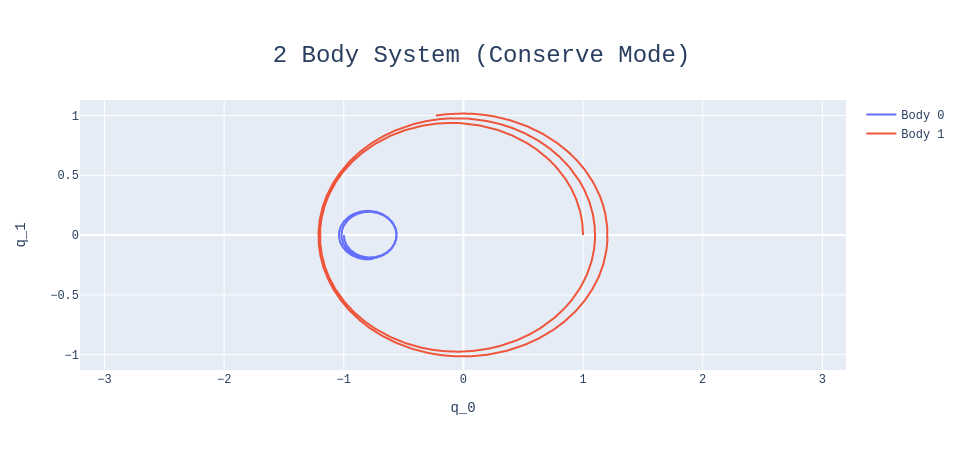

In [6]:
title = dict(text='2 Body System (Conserve Mode)', font=dict(size=24),
             x=0.5, y=0.9, xanchor='center', yanchor='top')
layout = go.Layout(title=title, xaxis_title='q_0', yaxis_title='q_1',
                   font=dict(family='Courier New, monospace', size=12),
                   yaxis=dict(scaleanchor='x', scaleratio=1))
traces = [go.Scatter(x=history[:, body, 0].detach().numpy(),
                     y=history[:, body, 1].detach().numpy(),
                     name='Body ' + str(body))
          for body in range(history.shape[1])]
fig = go.Figure(data=traces, layout=layout)
fig.show()

In [7]:
state = State(q=q0, p=p0, t=0)
solver = Solver(drag=0.05, mode='dissipate')

In [8]:
history = torch.zeros(num_steps, *state.q.shape)
for index in range(num_steps):
    history[index] = state.q.clone()
    state.zero_grad()
    H = two_body_hamiltonian(state, m=m, G=G)
    H.backward()
    dq_dt, dp_dt = solver.time_derivatives(state)
    state.advance_(dq_dt, dp_dt, time_step)

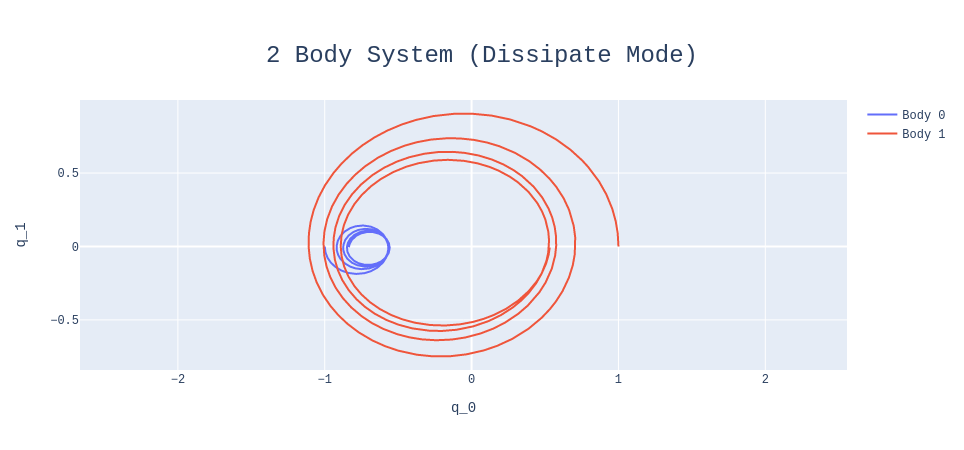

In [9]:
title = dict(text='2 Body System (Dissipate Mode)', font=dict(size=24),
             x=0.5, y=0.9, xanchor='center', yanchor='top')
layout = go.Layout(title=title, xaxis_title='q_0', yaxis_title='q_1',
                   font=dict(family='Courier New, monospace', size=12),
                   yaxis=dict(scaleanchor='x', scaleratio=1))
traces = [go.Scatter(x=history[:, body, 0].detach().numpy(),
                     y=history[:, body, 1].detach().numpy(),
                     name='Body ' + str(body))
          for body in range(history.shape[1])]
fig = go.Figure(data=traces, layout=layout)
fig.show()

In [10]:
state = State(q=q0, p=p0, t=0)
H = two_body_hamiltonian(state, m=m, G=G).item()
solver = Solver(target=H, rate=0.5, mode='target')

In [11]:
history = torch.zeros(num_steps, *state.q.shape)
for index in range(num_steps):
    history[index] = state.q.clone()
    state.zero_grad()
    H = two_body_hamiltonian(state, m=m, G=G)
    H.backward()
    dq_dt, dp_dt = solver.time_derivatives(state)
    state.advance_(dq_dt, dp_dt, time_step)

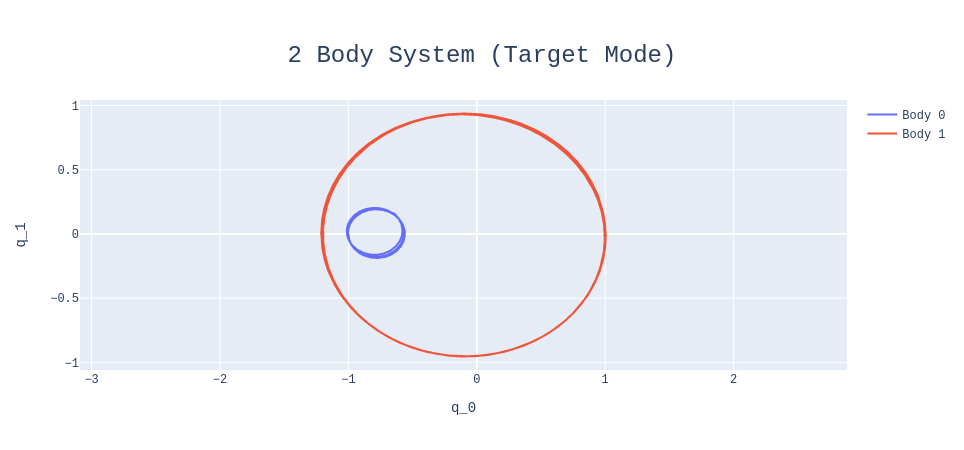

In [12]:
title = dict(text='2 Body System (Target Mode)', font=dict(size=24),
             x=0.5, y=0.9, xanchor='center', yanchor='top')
layout = go.Layout(title=title, xaxis_title='q_0', yaxis_title='q_1',
                   font=dict(family='Courier New, monospace', size=12),
                   yaxis=dict(scaleanchor='x', scaleratio=1))
traces = [go.Scatter(x=history[:, body, 0].detach().numpy(),
                     y=history[:, body, 1].detach().numpy(),
                     name='Body ' + str(body))
          for body in range(history.shape[1])]
fig = go.Figure(data=traces, layout=layout)
fig.show()